* Inspecting the Data
* Cleaning the Data
    * (go through 1 by 1)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')

# Inspecting the Data

In [22]:
df.shape

(21597, 21)

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
df.info()
#There appears to be a few columns with NA values

#Format of Data
#can see from the table below that a few series are not in the right format for us to use.  
#date - is an object, we want it to be datetime
#sqft_basement - is an object, we want it to be int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## NA Values

We saw from the info that there are a number of Series with Na values.

In [26]:
df.isna().sum().sort_values(ascending=False).head()

yr_renovated    3842
waterfront      2376
view              63
sqft_lot15         0
date               0
dtype: int64

## Identifying Outliers

In [46]:
scatter_columns = list(df.columns)
scatter_columns.remove('id')
scatter_columns.remove('date')
scatter_columns.remove('price')
len(scatter_columns)

18

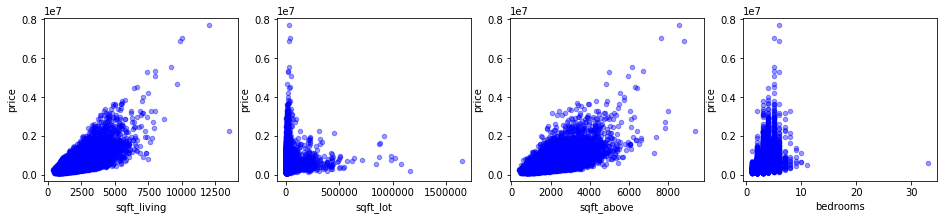

In [41]:
#need to plot this again once we've cleaned sqft_basement and other

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

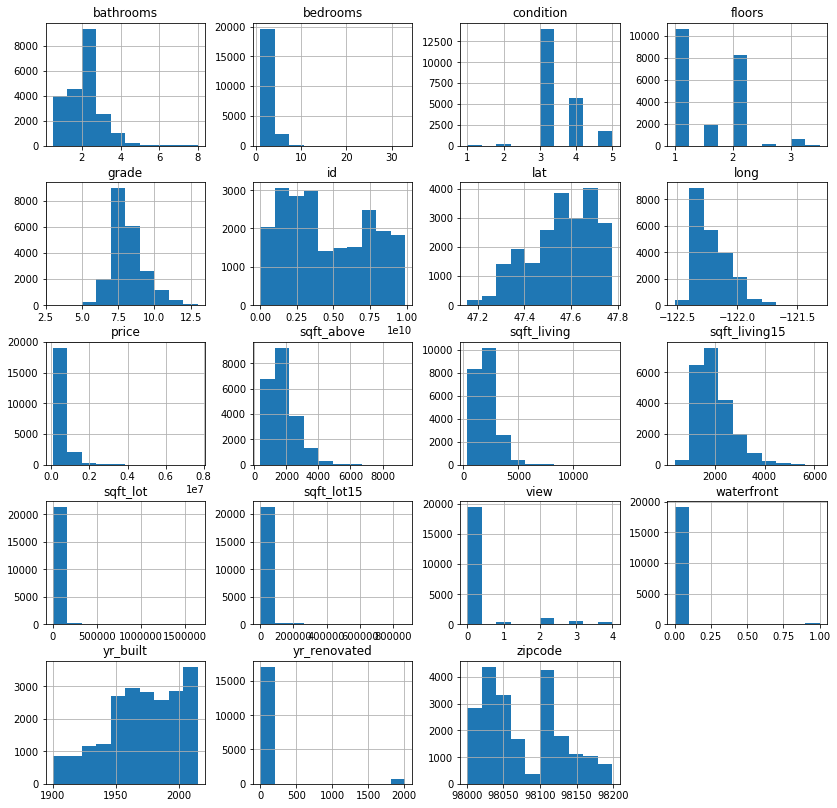

In [49]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (14,14))
ax = fig.gca()
df.hist(ax = ax);

# Cleaning the Data

In [17]:
df_cleaned = df

### id
* we can use this to check for duplicates in the dataframe
* otherwise not veyr useful to us


### date
* in object format, need to change to datetime

### price
*

### bedrooms

### bathrooms

### sqft_living

### sqft_lot

### floors

### waterfront
* has 2376 NA values

In [18]:
# replaced the NaN values in 'waterfront' with the value 2.
df_cleaned['waterfront'] = df_cleaned['waterfront'].replace(np.nan,2)

### view
* has 63 NA values

### condition

### grade

### sqft_above

### sqft_basement
* have ? values and Nan values
* wrong format, needs to be int64 not string

In [15]:
df['sqft_basement'].sort_values(ascending=False).head(2)

19234    ?
6410     ?
Name: sqft_basement, dtype: object

### yr_built

### yr_renovated
* Has 3842 NA Values

### zipcode

### lat

### long

### sqft_living15

### sqft_lot15